# Assignment 3
## Gal Dali

### Question 1

$\text{We already know the trick from the lesson, write the taylor expansion and "massage" the equations to get an expression for } f'(x)$  

$f(x + 2h) = f(x) + 2hf'(x) + \frac {(2h)^2f''(x)}{2} + \frac {(2h)^3f'''(x)}{6} + \frac {(2h)^4f''''(x)}{24} + O(h^5)$  
$f(x - 2h) = f(x) - 2hf'(x) + \frac {(2h)^2f''(x)}{2} - \frac {(2h)^3f'''(x)}{6} + \frac {(2h)^4f''''(x)}{24} + O(h^5)$  
    
$f(x + h) = f(x) + hf'(x) + \frac {h^2f''(x)}{2} + \frac {h^3f'''(x)}{6} + \frac {h^4f''''(x)}{24} + O(h^5)$  
$f(x - h) = f(x) - hf'(x) + \frac {h^2f''(x)}{2} - \frac {h^3f'''(x)}{6} + \frac {h^4f''''(x)}{24} + O(h^5)$  
  
$\text{Now we can combine the equations to get an expression for } f'(x)$  
$A \triangleq  f(x + 2h) - f(x - 2h) = 4hf'(x) + \frac {8h^3f'''(x)}{3} + O(h^5)$  
$B \triangleq f(x + h) - f(x - h) = 2hf'(x) + \frac {h^3f'''(x)}{3} + O(h^5)$  

$\text{Notice that } 4B - A/2 = 6hf'(x) + O(h^5)$  
$\text{So that means that } f'(x) = \frac {4B - A/2}{6h} + O(h^5) / 6h = \frac {4B - A/2}{6h} + O(h^4)$  
$\text{I can simplify the expression a little to get rid of the half-term at the end } f'(x) = \frac {8B - A}{12h} + O(h^4)$  

$\text{So the final answer is plugging in A and B } f'(x) = \frac {8(f(x + h) - f(x - h)) - (f(x + 2h) - f(x - 2h))}{12h} + O(h^4)$

### Question 2

In [36]:
import matplotlib.pyplot as plt
import numpy as np

#### Part A:

In [37]:
def compute_derivative(f, x, h):
    return (f(x + h) - f(x)) / h


def compute_derivative_symmetric(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

#### Part B:

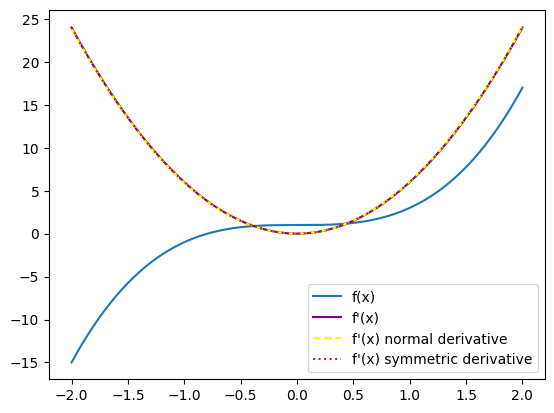

In [38]:
def f(x):
    return 2 * (x ** 3) + 1


def derivative_f(x):
    return 6 * (x ** 2)


# Define range of x values:
a = -2
b = +2

# Define step size:
h = 0.01

# Graph the derivative of f(x) and the computed derivative of f(x):
x = np.arange(a, b + h, h)  # b + h to include b in the range
y = f(x)
y_prime = derivative_f(x)
y_prime_normal = compute_derivative(f, x, h)
y_prime_symmetric = compute_derivative_symmetric(f, x, h)

plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)", linestyle="solid", color='purple')
plt.plot(x, y_prime_normal, label="f'(x) normal derivative", linestyle='dashed', color='yellow')
plt.plot(x, y_prime_symmetric, label="f'(x) symmetric derivative", linestyle='dotted', color='brown')
plt.legend()
plt.show()

### Question 3

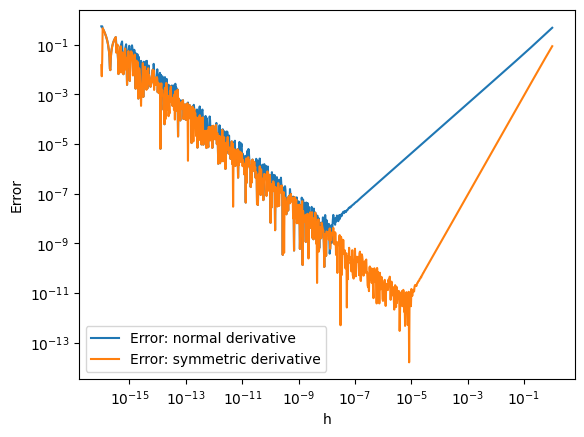

In [39]:
h_values = np.logspace(0, -16, num=1000, base=10)

# Compute derivative of sin(x) at x=1
x = 1
f = np.sin
f_prime = np.cos
f_prime_computed = compute_derivative(f, x, h_values)
f_prime_symmetric = compute_derivative_symmetric(f, x, h_values)

# Compute the error
error_computed = np.abs(f_prime_computed - f_prime(x))
error_symmetric = np.abs(f_prime_symmetric - f_prime(x))

# Plot the error in a loglog scale
plt.loglog(h_values, error_computed, label='Error: normal derivative')
plt.loglog(h_values, error_symmetric, label='Error: symmetric derivative')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

$\text{ We can see from the graph that the symmetric derivative is more accurate, and we can see that the optimal value for the symmetric derivative of h is around } 10^{-5} \text{ and the optimal value of h for the normal derivative is around } 10^{-8}.$

### Question 4

$\phi = \frac {\sqrt{5} - 1}{2}, \quad  \phi^n = \phi^{n-2} - \phi^{n-1}$

In [40]:
# basic recursive implementation
def phi_power_basic(n:int) -> float:
    phi_0 = 1
    phi_1 = (np.sqrt(5) - 1) / 2
    if n == 0:
        return phi_0
    if n == 1:
        return phi_1
    return phi_power_basic(n - 2) - phi_power_basic(n - 1)

# improved recursive implementation using dynamic programming & memoization
def phi_power_memo1(n:int, memo={}) -> float:
    phi_0 = 1
    phi_1 = (np.sqrt(5) - 1) / 2
    if n == 0:
        return phi_0
    if n == 1:
        return phi_1
    if n in memo:
        return memo[n]
    memo[n] = phi_power_memo1(n - 2, memo) - phi_power_memo1(n - 1, memo)
    return memo[n]

# define the memoize decorator (copied from the internet)
def memoize(func):
    cache = {}
    def memoized_func(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result
    return memoized_func

# memoization using decorator
@memoize
def phi_power_memo2(n: int) -> float:
    phi_0 = 1
    phi_1 = (np.sqrt(5) - 1) / 2
    if n == 0:
        return phi_0
    if n == 1:
        return phi_1
    return phi_power_memo2(n - 2) - phi_power_memo2(n - 1)

# improving to O(1) space complexity using only the last two values
def phi_power_optimized(n:int) -> float:
    phi_prev_2 = 1
    phi_prev_1 = (np.sqrt(5) - 1) / 2
    if n == 0:
        return phi_prev_2
    if n == 1:
        return phi_prev_1
    phi_current = 0
    for i in range(2, n + 1):
        phi_current = phi_prev_2 - phi_prev_1
        phi_prev_2 = phi_prev_1
        phi_prev_1 = phi_current

    return phi_current

#### Proof that the recursive algorithm is correct:
##### Proof by induction:  

$\text{Base case: } n = 0, n = 1$
$\text{For } n = 0, \phi^0 = 1, \text{ and for } n = 1, \phi^1 = \frac {\sqrt{5} - 1}{2}$  

$\text{Inductive hypothesis: suppose the following is correct } \forall n < m:  \phi^n = \phi^{n-2} - \phi_{n-1}$  

$\text{Inductive step: } \phi^m = \phi^{m-2} - \phi^{m-1} \text{ by the inductive hypothesis, } \phi^{m-1} \text{ and } \phi^{m-2} \text{ are correct and } \phi^m \text{ is built by the recursive definition, thus the recursive formula is correct.}$

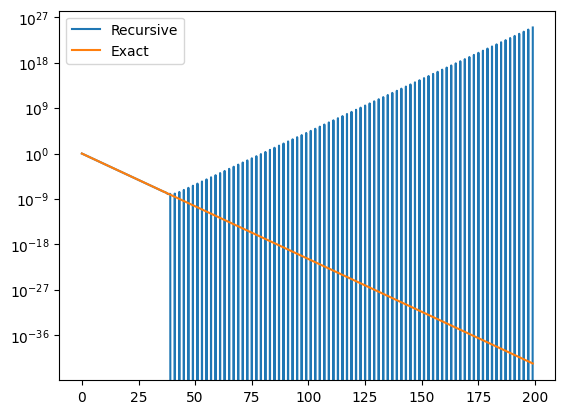

In [41]:
# Note: even this 'exact' calculation isn't really exact since phi is irrational...
def calculate_power_phi_exact(n):
    phi = (np.sqrt(5) - 1) / 2
    return phi ** n

n_values = np.arange(0, 200)
phi_values_exact = np.array([calculate_power_phi_exact(n) for n in n_values])
phi_values_rec_formula = np.array([phi_power_optimized(n) for n in n_values])

# graph the exact results and the recursive results
plt.plot(n_values, phi_values_rec_formula, label='Recursive')
plt.plot(n_values, phi_values_exact, label='Exact')
plt.yscale('log')
plt.legend()
plt.show()